In [1]:
# setup for Colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# download packages
!pip install numpy
!pip install pandas
!pip install sklearn

# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=49354a573dcc0e947c8d5c93db35ac5bf7406758b5ae252c76a0d607b0128113
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [3]:
root_dir = '/content/gdrive/MyDrive/oc_projet_7'

data_path = root_dir + '/data/' + 'df_preprocessed_2.pkl'

## Get data

In [4]:
# load df
test_mode = False
test_mode_samples = 1000

df_processed = pd.read_pickle(data_path)
if test_mode:
    df_processed = df_processed.sample(n=test_mode_samples, random_state=0)
df_processed

,text,label
0,"[<user>, <url>, -, awww, ,, that, is, a, bumme...",0
1,"[is, upset, that, he, cannot, update, his, fac...",0
2,"[<user>, i, dived, many, time, for, the, ball,...",0
3,"[my, whole, body, feel, itchy, and, like, it, ...",0
4,"[<user>, no, ,, it, is, not, behaving, at, all...",0
...,...,...
1599995,"[just, woke, up, ., having, no, school, is, th...",4
1599996,"[thewdb.com, -, very, cool, to, hear, old, wal...",4
1599997,"[are, you, ready, for, your, mojo, makeover, ?...",4
1599998,"[happy, 38th, birthday, to, my, boo, of, alll,...",4


In [5]:
y = np.array(df_processed['label'])
print(y.shape, '\n')

(1600000,) 



## Bag of words

In [6]:
nb_features = 500

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=nb_features)
X = matrix.fit_transform(df_processed['text'].apply(' '.join)).toarray()
print(X.shape, '\n')
print(X)

(1600000, 500) 

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# all words (alphabetically sorted)
nb_words_shown = 100
print(matrix.get_feature_names_out()[:nb_words_shown])

['able' 'about' 'actually' 'add' 'after' 'again' 'ago' 'ah' 'all' 'almost'
 'alone' 'already' 'also' 'always' 'am' 'amazing' 'an' 'and' 'another'
 'any' 'anymore' 'anyone' 'anything' 'are' 'around' 'at' 'awake' 'away'
 'awesome' 'aww' 'awww' 'baby' 'back' 'bad' 'be' 'beach' 'beautiful'
 'because' 'bed' 'been' 'before' 'being' 'believe' 'best' 'better' 'big'
 'birthday' 'bit' 'blog' 'boo' 'book' 'bored' 'boring' 'both' 'boy'
 'break' 'breakfast' 'brother' 'busy' 'but' 'buy' 'by' 'call' 'came' 'can'
 'cannot' 'car' 'care' 'cat' 'change' 'check' 'class' 'coffee' 'cold'
 'com' 'come' 'coming' 'computer' 'concert' 'cool' 'could' 'course'
 'crazy' 'cry' 'cute' 'cuz' 'dad' 'damn' 'day' 'did' 'dinner' 'do' 'doe'
 'dog' 'doing' 'done' 'down' 'dream' 'drink' 'dude']


In [8]:
# all words and nb occurences
print(matrix.vocabulary_)

{'user': 447, 'url': 444, 'awww': 30, 'that': 402, 'is': 208, 'you': 498, 'got': 160, 'of': 286, 'day': 88, 'to': 423, 'do': 91, 'it': 209, 'he': 175, 'cannot': 65, 'update': 443, 'his': 190, 'facebook': 118, 'by': 61, 'and': 17, 'might': 252, 'cry': 83, 'school': 348, 'today': 424, 'also': 12, 'many': 246, 'time': 421, 'for': 136, 'the': 403, 'number': 285, 'rest': 337, 'go': 154, 'out': 303, 'my': 271, 'whole': 475, 'feel': 123, 'like': 226, 'on': 294, 'no': 281, 'not': 282, 'at': 25, 'all': 8, 'am': 14, 'why': 476, 'here': 186, 'because': 37, 'see': 350, 'over': 305, 'there': 407, 'need': 274, 'hug': 199, 'hey': 187, 'long': 232, 'yes': 495, 'rain': 328, 'bit': 47, 'only': 298, 'lol': 231, 'fine': 129, 'thanks': 401, 'how': 198, 'they': 409, 'did': 89, 'have': 173, 'me': 249, 'break': 55, 'in': 204, 'just': 211, 'could': 80, 'watch': 457, 'thought': 416, 'wa': 451, 'know': 215, 'either': 103, 'never': 275, 'talk': 395, 'anymore': 20, 'would': 487, 'been': 39, 'first': 131, 'but': 59

## Create train/validation sets

In [24]:
# convert labels: negative is 0, positive is 1
y_origin = np.array(df_processed['label'])

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y_origin)
print(le.classes_)

y = le.transform(y_origin)

print(np.unique(y))
print(np.unique(le.inverse_transform(y)))

[0 4]
[0 1]
[0 4]


In [26]:
test_ratio = 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_ratio, 
                                                    stratify=y, 
                                                    random_state=0)

print('train:', X_train.shape, '->', y_train.shape)
print(' test:', X_test.shape, '->', y_test.shape)

train: (1280000, 500) -> (1280000,)
 test: (320000, 500) -> (320000,)


## Logistic regression

In [36]:
# create and train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', 
                           random_state=0)

model.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=0)

In [37]:
# get predictions
y_proba = model.predict_proba(X_test)[:,1]
threshold = 0.5
y_pred = np.where(y_proba >= threshold, 1, 0)


# score on test set
beta = 2
from sklearn.metrics import fbeta_score
score = fbeta_score(y_test, y_pred, beta=beta)
print(f'F-{beta} score =', round(score, 3))

from sklearn.metrics import accuracy_score
print('accuracy =', round(accuracy_score(y_test, y_pred), 3))

F-2 score = 0.769
accuracy = 0.753


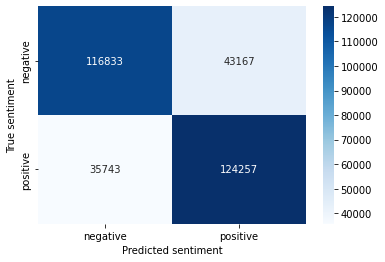

In [38]:
def show_confusion_matrix(confusion_matrix):
    hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
    hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels())
    hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels())
    plt.ylabel('True sentiment')
    plt.xlabel('Predicted sentiment')

class_names = ['negative', 'positive']

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)